In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification, make_regression

import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier


sns.set()

### Funciones Auxiliares

Usaremos estas funciones para ver los resultados de nuestros experimentos

In [ ]:
def pintar_resultados_regresion(X,y_real, X_train,y_train_pred,X_test,y_test_pred):
    plt.figure()
    sns.scatterplot(x=X_train,y=y_train, label = 'Valores de train');
    index_train = np.argsort(X_train)
    plt.plot(X_train[index_train],y_train_pred[index_train], color='red', label='Predicción de la regresión');
    plt.plot(X, y_real, color='green', linewidth=2, label='Función real',alpha=0.2);
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
    plt.title('Datos de train');

    plt.figure()
    sns.scatterplot(x=X_test,y=y_test, label = 'Valores de test');
    index = np.argsort(X_test)
    plt.plot(X_test[index],y_test_pred[index], color='red', label='Predicción de la regresión');
    plt.plot(X, y_real, color='green', linewidth=2, label='Función real',alpha=0.2);
    plt.title('Datos de test');
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');



def pintar_resultados_clasificacion(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title('Valores reales Train')
    sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train, marker='o', label='Clases')
    plt.subplot(1,2,2)
    plt.title('Predicciones Train')
    sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train_pred, marker='o', label='Clases')

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title('Valores reales Test')
    sns.scatterplot(x=X_test[:,0], y=X_test[:, 1], hue=y_test, marker='x', label='Clases')
    plt.subplot(1,2,2)
    plt.title('Predicciones Test')
    sns.scatterplot(x=X_test[:,0], y=X_test[:, 1], hue=y_test_pred, marker='x', label='Clases')

# Regresión 

En una regresión queremos predecir la tendencia que siguen los datos. Siendo estos datos variables continuas.  

##  Regresión Lineal

Para ver como funciona la regresión lineal vamos a generar datos sintéticos, así tendremos el valor real que seguiría la función que queremos predecir.

En concreto, vamos a predecir los valores y de la función:

$y = 1 + 0.5x$

Para generar los datos sintéticos usaremos la función base y le añadiremos ruido gausiano. 

In [ ]:
N = 50
noise = 0.4

X = np.linspace(0, 10, N)
y_real =  1 + 0.5*X 

y = 1 + 0.5*X + np.random.normal(0,noise,N) #ruido gaussiano

sns.scatterplot(x=X,y=y, label='Muestras');
plt.plot(X, y_real, color='green', linewidth=2, label='Función Real',alpha=0.2);
plt.legend();

Los separamos en train (2/3) y test (1/3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sns.scatterplot(x=X_train, y=y_train, marker='o', label='train')
sns.scatterplot(x=X_test, y=y_test,marker='x', label='test')
plt.legend()
plt.title('Train and test split')

In [ ]:
# Declaramos el modelo
lr = LinearRegression()

# Lo entrenamos
lr.fit(X_train.reshape(-1, 1), y_train)

# Pintamos la predicción sobre los datos
y_train_pred = lr.predict(X_train.reshape(-1,1))
y_test_pred = lr.predict(X_test.reshape(-1, 1))
pintar_resultados_regresion(X,y_real, X_train,y_train_pred,X_test,y_test_pred)



Hemos tenido unos muy buenos resultados 

<img src=https://images-na.ssl-images-amazon.com/images/I/71%2BncdWcmRL.png width="150">


Pero... que pasaría si tenemos datos no lineales?

Vamos a generar datos sintéticos no lineales para ver que pasa.

Esta vez siguiendo la función $y=sin(x)$

In [ ]:
N = 50 # number of data points
X = np.linspace(0, 4*np.pi, N)
y =np.sin(X)  + np.random.normal(0,0.2,N)
y_real = np.sin(X) 
sns.scatterplot(x=X,y=y, label='Samples')
plt.plot(X, y_real, color='green', linewidth=2, label='Function real',alpha=0.2);
plt.legend();

Separamos los datos en train (1/3) y test (2/3).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
sns.scatterplot(x=X_train, y=y_train, marker='o', label='train')
sns.scatterplot(x=X_test, y=y_test,marker='x', label='test')
plt.legend();
plt.title('Train and test split');

Entrenamos el modelo con los datos nuevos y predecimos el resultado.

In [ ]:
# Declaramos el modelo
lr = LinearRegression()

# Lo entrenamos
lr.fit(X_train.reshape(-1, 1), y_train)

# Pintamos la predicción sobre los datos
y_train_pred = lr.predict(X_train.reshape(-1, 1))

y_test_pred = lr.predict(X_test.reshape(-1, 1))

print('Mean squared error: ', mean_squared_error(y_test, y_test_pred))

pintar_resultados_regresion(X,y_real, X_train,y_train_pred,X_test,y_test_pred)

Los resultados no son tan buenos.. 

<img src=https://i1.sndcdn.com/artworks-000475134603-4i982j-t500x500.jpg width="150">


## Regresión polinómica

La regresión logística no es suficientemente compleja como para poder predecir los datos de nuestra función. Necesitamos maquinaria más potente. 

Para solucionar este problema vamos a utilizar una regresión polinómica. O lo que es lo mismo: vamos a aplicar una transformación polinómica a nuestros datos y luego vamos a aplicar una regresión lineal sobre los datos transformados. 

$Transformación(x) = \hat{x} = constante + x + x^2 + x^3 + ... x^{n - 1}$

$Regresión\_lineal(\hat{x}) = Regresión\_lineal(x + x^2 + x^3 + ... x^{n-1}) = Regresión\_polinómica(x)$ 

In [ ]:
n = 2 # Que pasa si cambiamos el grado máximo de la transformación?
poli_transform = PolynomialFeatures(n)
X_poli_train = poli_transform.fit_transform(X_train.reshape(-1, 1))
X_poli_test = poli_transform.transform(X_test.reshape(-1, 1))

model =  LinearRegression()

model.fit(X_poli_train, y_train)

y_train_pred = model.predict(X_poli_train)

y_test_pred = model.predict(X_poli_test)

print('Mean squared error: ', mean_squared_error(y_test, y_test_pred))
pintar_resultados_regresion(X,y_real, X_train,y_train_pred,X_test,y_test_pred)

Si utilizamos un polinómio de grado 7 aproxíma bastante bien.

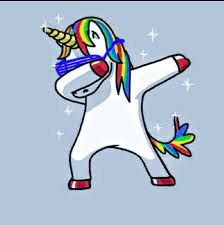

# Clasificación

Ahora vamos a ver como trabajaríamos con un problema de clasificación. 

Esta vez nuestros datos van a tener dos dimensiones. 

## Regresión Logística

A pesar de su nombre, la regresión logística es un modelo de clasificación. 

Este modelo es muy parecido a la regresión lineal.

La unica diferencia es que al resultado de la regresión lineal le aplicamos una función sigmoide. De esta forma, a partir de un resultado continuo obtenemos dos clases. 

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1280px-Logistic-curve.svg.png width="450">

### Con unos datos fáciles

Esta vez vamos a intentar clasificar unos datos linealmente separables. 

Este tipo de datos no son comunes en la vida real, pero lo vamos a utilizar como ejemplo. 

Estos datos tienen dos dimensiones, cada punto tendrá un valor para el eje horizontal y otro para el eje vertical.

Cada punto corresponderá con una clase, esta clase va s ser lo que queremos predecir.

In [ ]:
N_SAMPLES = 500
NOISE = 0
N_VARIABLES = 2

X, y = make_classification(n_samples=N_SAMPLES, n_features=N_VARIABLES, n_redundant=0, n_informative=N_VARIABLES,
                               random_state=1, n_clusters_per_class=1, class_sep=2-NOISE)

print(X[:4], y[:4])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, marker='o');

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train, marker='o', label='train')
sns.scatterplot(x=X_test[:,0], y=X_test[:, 1], hue=y_test,marker='x', label='test')
plt.legend();
plt.title('Train and test split');

Si utilizamos una regresión logística para clasificar este tipo de datos vemos un muy bunen resultado. 

Nuestro modelo a acertado para todas las muestras!

Ahora vamos a ver que pasa si añadimos ruido a los datos. Funciona igual de bien?

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

### Con datos un poco más difíciles

Vamos a probar que pasa con unos datos un poco más complicados.

In [ ]:
ruido = 0.1

X, y= make_moons(n_samples=N_SAMPLES, noise=ruido, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train, marker='o', label='train')
sns.scatterplot(x=X_test[:,0], y=X_test[:, 1], hue=y_test,marker='x', label='test')
plt.legend();
plt.title('Train and test split');

Pues no tenemos tan buenos resultados. 

Esto pasa por que estamos intentando clasificar dos grupos no linealmente separables con un modelo lineal. 

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

Y con unos datos aun más complicados? 

In [ ]:
X, y= make_circles(n_samples=N_SAMPLES, noise=ruido, factor=0.5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train, marker='o', label='train')
sns.scatterplot(x=X_test[:,0], y=X_test[:, 1], hue=y_test,marker='x', label='test')
plt.legend();
plt.title('Train and test split');

Pues tenemos un puñetero desastre.

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

Para datos no linealmente separables vamos a tener que: 
* Transformarlos no linealmente, como hicimos en el ejemplo de regresión.
* Utilizar un modelo no lineal. 

Ahora vamos a ver como se comportaría un modelo no lineal. 

## K-Nearest Neighbors(KNN)

Para clasificar una muestra por knn se busca las k muestras más parecidas a esta y se le asigna la clase más común dentro de estas muestras. 

Para este caso concreto mediremos como de parecidas son dos muestras utilizando la distancia euclidea, pero el concepto de "parecido" se puede definir como queramos. 

In [ ]:
X, y = make_classification(n_samples=N_SAMPLES, n_features=N_VARIABLES, n_redundant=0, n_informative=N_VARIABLES,
                               random_state=1, n_clusters_per_class=1, class_sep=2-NOISE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1, )
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
accuracy_score = knn.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

In [ ]:
ruido = 0.1

X, y= make_moons(n_samples=N_SAMPLES, noise=ruido, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1, )
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
accuracy_score = knn.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

In [ ]:
X, y= make_circles(n_samples=N_SAMPLES, noise=ruido, factor=0.5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


knn = KNeighborsClassifier(n_neighbors=1, )
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
accuracy_score = knn.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

En estos ejemplos hemos trabajado con datos de juguete. Son datos pequeños de los cuales nosotros conocemos la verdara clase o distribución de las muestras. 
En el mundo real esto no pasa. Generalmente no vamos a saber la verdad que se oculta de nuestros datos, y generalmente los datos van a ser más complicados. 

Que pasa si queremos clasificar imágenes? Que pasa si queremos clasificar texto? Estos datos son mucho más complicados y necesitan más potencia de computación. En la sesión siguiente hablaremos de como se puede utilizar un super computador para resolverlos. 



# Pima Diabetes dataset

Predecir si un paciente tiene diabetes a partir de sus datos clínicos. 

In [1]:
import pandas as  pd

In [2]:
pima = pd.read_csv('https://gist.githubusercontent.com/chaityacshah/899a95deaf8b1930003ae93944fd17d7/raw/3d35de839da708595a444187e9f13237b51a2cbe/pima-indians-diabetes.csv')

pima.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima_variables = pima.iloc[:,:-1]
pima_objetivo = pima.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pima_variables, pima_objetivo, test_size=0.33, random_state=42)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
accuracy_score = knn.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))